In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Full Name: Trương Huỳnh Thúy An

Student ID: 22520033

**Experiment Requirements (for all datasets)**
- Train - test splitting ratio = 7:3.
- Random_state = 'Your Student ID'.
- Experiment with **Gradient Descent** (*max_iter = 200*, *learning_rate (eta)* is set by yourself) and **Normal Equation**.
- Visualize the cost trend (only for Gradient Descent)
- Evaluation Metric: **R2 score**.
- After completing all requirements, click on ‘Runtime’ and choose ‘Restart and run all’.
- If the code is run without any errors (and the results are the same as before re-running), download the .ipybn file and submit.
Otherwise, check the code carefully.


# Fish Dataset

🐟🐟 **Dataset Information (fish.csv)** 🐟🐟
- Weight: Weight of fish in gram
- Length1: Vertical length in cm
- Length2: Diagonal length in cm
- Length3: Cross length in cm
- Height: Height in cm
- Width: Diagonal width in cm

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the **weight** of fish.


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in Data Preprocessing tutorial file.

In [1]:
# Code here
import pandas as pd
fish_data = pd.read_csv('fish.csv')
fish_data

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import numpy as np
import matplotlib.pyplot as plt

var_columns = [c for c in fish_data.columns if c not in ['Weight']]
y = fish_data['Weight']

X = fish_data.loc[:,var_columns]
X = scale(X)
y = scale(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=22520033)

In [3]:
# Gradient Descent

class LinearRegression_GD:
    def __init__(self, eta = 0.001, max_iter = 20, random_state = 42):
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
        self.w = None
        self.costs = [ ]
    def predict(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.costs = [ ]
        for n_iters in range(self.max_iter):
            y_pred = self.predict(X)
            diff = y - y_pred
            self.w[0] += self.eta * np.sum(diff)

            for j in range(X.shape[1]):
                delta = 0.0
                for i in range(X.shape[0]):
                    delta += self.eta * diff[i] * X[i][j]
                self.w[j + 1] += delta
                

            cost = np.sum(diff ** 2) / 2
            self.costs.append(cost)

In [4]:
regr_GD = LinearRegression_GD(eta=0.0001, max_iter=2000,random_state=22520033)
regr_GD.fit(X_train, y_train)

print("X.shape = {}, Y.shape = {}".format(X_train.shape, y_train.shape))

w_GD = regr_GD.w
w_GD

X.shape = (111, 5), Y.shape = (111,)


array([0.0056157 , 0.25834698, 0.21919395, 0.15704047, 0.11005185,
       0.24908179])

In [5]:
# Normal Equation
from sklearn.linear_model import LinearRegression
regr_NE = LinearRegression()
regr_NE.fit(X_train, y_train)

w_NE = np.append(regr_NE.intercept_, regr_NE.coef_)
w_NE

array([ 0.00515471,  1.32218134,  0.1458784 , -0.8616429 ,  0.28490248,
        0.14521996])

In [6]:
from sklearn.metrics import r2_score as R2
y_pred_GD = regr_GD.predict(X_train)
round(R2(y_train, y_pred_GD), 6)

0.878246

In [7]:
y_pred_NE = regr_NE.predict(X_train)
round(R2(y_train, y_pred_NE), 6)

0.881268

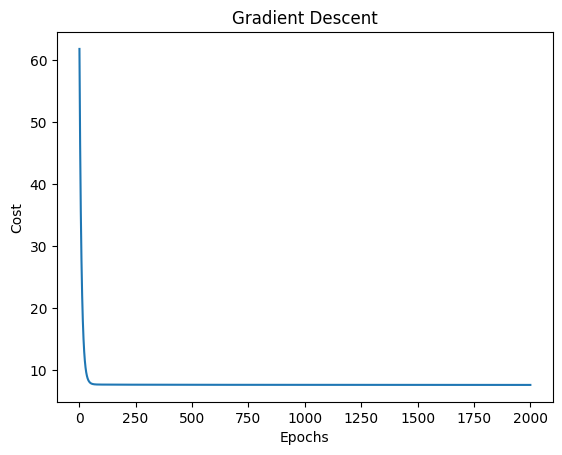

In [8]:
plt.plot(range(1, len(regr_GD.costs) + 1), regr_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

# Insurance Dataset

💰💰 **Dataset Information (insurance.csv)** 💰💰
- age: Age of primary beneficiary
- sex: Insurance contractor gender, female / male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoker / Non-smoker
- region: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest
- charges: Individual medical costs billed by health insurance

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the individual medical costs billed by health insurance ('**charges**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

In [10]:
# Code here
insurance_data = pd.read_csv('insurance.csv')
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
insurance_data['sex'] = label_encoder.fit_transform(insurance_data['sex'])
insurance_data['smoker'] = label_encoder.fit_transform(insurance_data['smoker'])
insurance_data['region'] = label_encoder.fit_transform(insurance_data['region'])
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [12]:
var_columns = [c for c in insurance_data.columns if c not in ['charges']]
y = insurance_data['charges']

X = insurance_data.loc[:,var_columns]
X = scale(X)
y = scale(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=22520033)

In [13]:
# Gradient Descent
regr_GD = LinearRegression_GD(eta=0.001, max_iter=200,random_state=22520033)
regr_GD.fit(X_train, y_train)

w_GD = regr_GD.w
w_GD

array([ 0.00429918,  0.30023973,  0.00376398,  0.16506783,  0.05752708,
        0.77659371, -0.04664524])

In [14]:
y_pred_GD = regr_GD.predict(X_train)
round(R2(y_train, y_pred_GD), 6)

0.730522

In [15]:
# Normal Equation
regr_NE = LinearRegression()
regr_NE.fit(X_train, y_train)

w_NE = np.append(regr_NE.intercept_, regr_NE.coef_)
w_NE

array([ 0.00429918,  0.30023973,  0.00376398,  0.16506783,  0.05752708,
        0.77659371, -0.04664524])

In [16]:
y_pred_NE = regr_NE.predict(X_train)
round(R2(y_train, y_pred_NE), 6)

0.730522

In [ ]:
plt.plot(range(1, len(regr_GD.costs) + 1), regr_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

# Tesla Stock Dataset

📈📈 **Dataset Information (tesla_stock.csv)** 📈📈
- Open: The opening price of the stock
- High: The high price of that day
- Low: The low price of that day
- Close: The closed price of that day
- Volume: The amount of stocks traded during that day

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to predict the closing price of tesla stock ('**Close**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

In [ ]:
# Code here
tesla_data = pd.read_csv('/content/drive/MyDrive/Assignment-2/tesla_stock.csv')
tesla_data

In [ ]:
var_columns = [c for c in tesla_data.columns if c not in ['Close']]
y = tesla_data['Close']

X = tesla_data.loc[:,var_columns]
X = scale(X)
y = scale(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=22520033)
X_train

In [ ]:
# Gradient Descent
regr_GD = LinearRegression_GD(eta=0.0001, max_iter=200,random_state=22520033)
regr_GD.fit(X_train, y_train)

w_GD = regr_GD.w
w_GD

In [ ]:
y_pred_GD = regr_GD.predict(X_train)
round(R2(y_train, y_pred_GD), 6)

In [ ]:
# Normal Equation
regr_NE = LinearRegression()
regr_NE.fit(X_train, y_train)

w_NE = np.append(regr_NE.intercept_, regr_NE.coef_)
w_NE

In [ ]:
y_pred_NE = regr_NE.predict(X_train)
round(R2(y_train, y_pred_NE), 6)

In [ ]:
plt.plot(range(1, len(regr_GD.costs) + 1), regr_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()